In [1]:
import os
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# CNN Analysis

In [2]:
model_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/cnn_analysis'

In [3]:
os.listdir(model_dir)

['global', 'human', 'inter']

In [132]:
df_list = list()
for task in os.listdir(model_dir):
    for model_name in os.listdir(os.path.join(model_dir, task)):
        try:
            df = pd.read_csv(os.path.join(model_dir, task, model_name, 'train.log'))
        except FileNotFoundError:
            continue

        df['model'] = model_name
        df['task'] = task
        config = model_name.split('_')
        df['cnn'] = config[0]
        df['rnn_size'] = int(config[1])
        df['rnn_type'] = config[2]
        df['rnn_layers'] = int(config[3])
        df['rnn_bidirectional'] = config[4]
        df['window_size'] = int(config[5])

        df_list.append(df)
df = pd.concat(df_list)
df['name'] = df['model']+'.'+ df['task']

In [81]:
color_map_test = {
    'bonito' : '#1f77b4',
    'catcaller' : '#ff7f0e',
    'causalcall' : '#2ca02c',
    'halcyon' : '#d62728',
    'mincall' : '#9467bd',
    'sacall' : '#8c564b',
    'urnano' : '#e377c2',
}

# Human

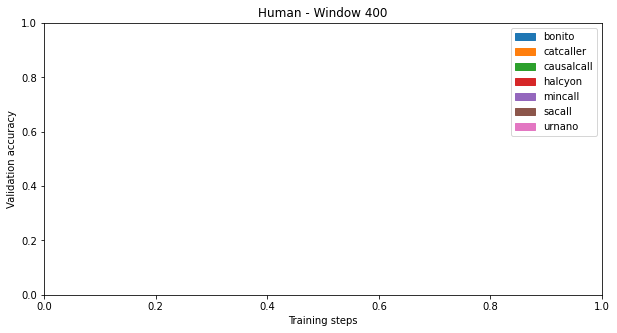

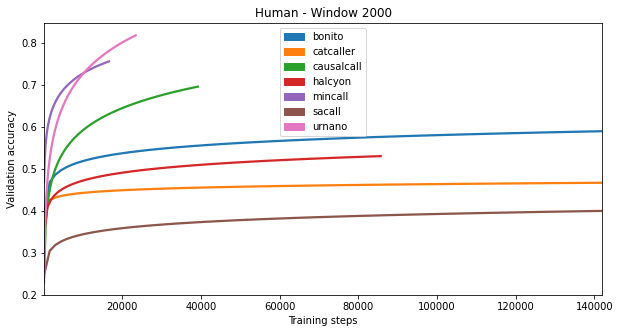

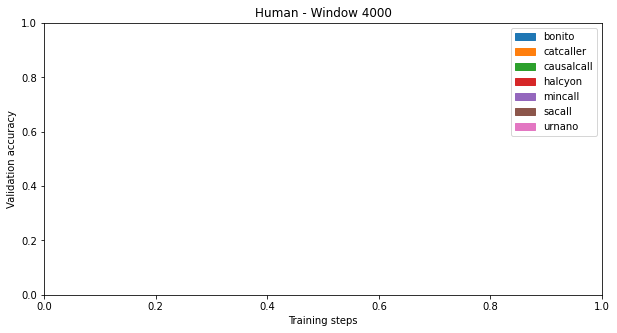

In [133]:
for ws in np.unique(df['window_size']):

    plot_df = df[df['window_size'] == ws]
    plot_df = plot_df[plot_df['rnn_size'] == 0]

    plt.figure(figsize=(10, 5))
    patchList = []
    for key in color_map_test:
            data_key = mpatches.Patch(color=color_map_test[key], label=key)
            patchList.append(data_key)


    for cnn in cnns:
        plotplot_df = plot_df[plot_df['cnn'] == cnn]
        sns.regplot(x="step", y="metric.accuracy.val", data=plotplot_df, x_estimator=np.mean, logx=True, ci=None, scatter=False, color=color_map_test[cnn])
    plt.legend(handles=patchList)
    plt.xlabel('Training steps')
    plt.ylabel('Validation accuracy')
    plt.title('Human - Window ' + str(ws))
    plt.show()

In [100]:
l = list()
for ws in np.unique(df['window_size']):

    plot_df = df[df['window_size'] == ws]
    for cnn in cnns:
        plotplot_df = plot_df[plot_df['cnn'] == cnn]

        l.append({'cnn': cnn,
                  'window_size': str(ws),
                  'accuracy': np.max(plotplot_df['metric.accuracy.val'])})

barplot_df = pd.DataFrame(l)

(0.4, 0.95)

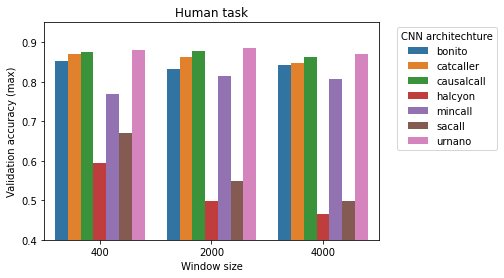

In [111]:
sns.barplot(x = 'window_size', y = 'accuracy', hue = 'cnn', data = barplot_df, palette=color_map_test)
plt.xlabel('Window size')
plt.ylabel('Validation accuracy (max)')
plt.title('Human task')
plt.legend(title='CNN architechture', bbox_to_anchor=(1.04,1), loc="upper left")
plt.ylim(0.4, 0.95)


In [124]:
l = list()
for ws in np.unique(df['window_size']):

    plot_df = df[df['window_size'] == ws]
    for cnn in cnns:
        plotplot_df = plot_df[plot_df['cnn'] == cnn]

        l.append({'cnn': cnn,
                  'window_size': str(ws),
                  'time': np.mean(plotplot_df['time'])/100})

barplot_df = pd.DataFrame(l)

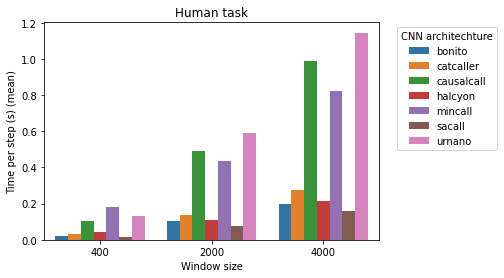

In [128]:
sns.barplot(x = 'window_size', y = 'time', hue = 'cnn', data = barplot_df, palette=color_map_test)
plt.xlabel('Window size')
plt.ylabel('Time per step (s) (mean)')
plt.title('Human task')
plt.legend(title='CNN architechture', bbox_to_anchor=(1.04,1), loc="upper left")

# Time Analysis

In [134]:
model_dir = '/hpc/compgen/projects/nanoxog/babe/analysis/mpages/models/time_analysis'

In [135]:
df_list = list()
for task in os.listdir(model_dir):
    for model_name in os.listdir(os.path.join(model_dir, task)):
        try:
            df = pd.read_csv(os.path.join(model_dir, task, model_name, 'train.log'))
        except FileNotFoundError:
            continue

        df['model'] = model_name
        df['task'] = task
        config = model_name.split('_')
        df['cnn'] = config[0]
        df['rnn_size'] = int(config[1])
        df['rnn_type'] = config[2]
        df['rnn_layers'] = int(config[3])
        df['rnn_bidirectional'] = config[4]
        df['window_size'] = int(config[5])

        df_list.append(df)
df = pd.concat(df_list)
df['name'] = df['model']+'.'+ df['task']

In [138]:
np.unique(df['rnn_type'])

array(['bonito', 'bonitorev'], dtype=object)